In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengubah parameter default matplotlib
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut

In [3]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load dataset

Untuk hands-on kita akan melihat dataset sintetik prediksi kebotakan. Agar running time-nya tidak terlalu lama, kali ini kita ambil sampel 1000 baris data saja.

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Ngajar/Rakamin/Labs/Food_Delivery_Dataset.csv")

# Descriptive Statistics

## Memeriksa kolom-kolom dan nilai hilang dengan `df.info()`

Hal pertama yang biasanya dilakukan dalam EDA adalah mengecek tipe data setiap kolom dan jumlah nilai yang hilang. Hal ini bisa kita lakukan dengan menggunakan `df.info()`.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           45593 non-null  object 
 1   delivery_person_id           45593 non-null  object 
 2   delivery_person_age          43739 non-null  float64
 3   delivery_person_ratings      43685 non-null  float64
 4   restaurant_latitude          45593 non-null  float64
 5   restaurant_longitude         45593 non-null  float64
 6   delivery_location_latitude   45593 non-null  float64
 7   delivery_location_longitude  45593 non-null  float64
 8   order_date                   45593 non-null  object 
 9   time_orderd                  43862 non-null  object 
 10  time_order_picked            45593 non-null  object 
 11  weather_conditions           44977 non-null  object 
 12  road_traffic_density         44992 non-null  object 
 13  vehicle_conditio

## Sampling untuk memahami data dengan `df.sample()`

In [6]:
df.sample(5)

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min
9758,0xb4b7,BANGRES02DEL01,33.0,4.7,12.970221,77.645396,13.080221,77.755396,12-03-2022,21:35,21:50,Fog,Jam,0,Meal,motorcycle,1.0,No,Metropolitian,41.0
40224,0x876,PUNERES18DEL01,NaN,NaN,18.593481,73.785901,18.703481,73.895901,23-03-2022,NaN,22:45,Fog,Low,2,Meal,scooter,0.0,No,Urban,29.0
37166,0xb0ab,SURRES010DEL03,37.0,4.8,21.171060,72.789292,21.231060,72.849292,05-03-2022,23:50,23:60,Cloudy,Low,1,Buffet,motorcycle,0.0,No,Metropolitian,16.0
4666,0x2a92,SURRES13DEL01,29.0,4.4,21.170096,72.789122,21.210096,72.829122,01-04-2022,12:15,12:20,Sunny,High,0,Buffet,motorcycle,2.0,No,Metropolitian,43.0
43378,0x6745,RANCHIRES09DEL02,27.0,4.5,23.351058,85.325731,23.401058,85.375731,01-04-2022,17:20,17:30,Fog,Medium,2,Meal,scooter,0.0,No,Metropolitian,15.0


In [7]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['id', 'delivery_person_id', 'weather_conditions', 'road_traffic_density', 'type_of_order', 'type_of_vehicle', 'festival', 'city']
nums = ['delivery_person_age', 'delivery_person_ratings', 'vehicle_condition', 'multiple_deliveries', 'time_taken_min']
timestamp = ['order_date', 'time_orderd', 'time_order_picked']
geoloc = ['restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude']

In [8]:
df[nums].describe()

,delivery_person_age,delivery_person_ratings,vehicle_condition,multiple_deliveries,time_taken_min
count,43739.000000,43685.000000,45593.000000,44600.000000,45593.000000
mean,29.567137,4.633780,1.023359,0.744664,26.294607
std,5.815155,0.334716,0.839065,0.572473,9.383806
min,15.000000,1.000000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,1.000000,1.000000,26.000000
75%,35.000000,4.900000,2.000000,1.000000,32.000000
max,50.000000,6.000000,3.000000,3.000000,54.000000


In [9]:
df[cats].describe()

,id,delivery_person_id,weather_conditions,road_traffic_density,type_of_order,type_of_vehicle,festival,city
count,45593,45593,44977,44992,45593,45593,45365,44393
unique,45593,1320,6,4,4,4,2,3
top,0x6b1a,JAPRES11DEL02,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1,67,7654,15477,11533,26435,44469,34093


In [10]:
df.isna().sum()

id                                0
delivery_person_id                0
delivery_person_age            1854
delivery_person_ratings        1908
restaurant_latitude               0
restaurant_longitude              0
delivery_location_latitude        0
delivery_location_longitude       0
order_date                        0
time_orderd                    1731
time_order_picked                 0
weather_conditions              616
road_traffic_density            601
vehicle_condition                 0
type_of_order                     0
type_of_vehicle                   0
multiple_deliveries             993
festival                        228
city                           1200
time_taken_min                    0
dtype: int64

In [11]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom id:
0x6b1a    1
0x255a    1
0x2d96    1
0xb028    1
0x41be    1
         ..
0x4657    1
0x4a7f    1
0x6d2     1
0x26a8    1
0x9b47    1
Name: id, Length: 45593, dtype: int64

Value count kolom delivery_person_id:
JAPRES11DEL02       67
PUNERES01DEL01      67
RANCHIRES02DEL01    66
JAPRES03DEL01       66
VADRES11DEL02       66
                    ..
GOARES01DEL03        7
BHPRES15DEL03        7
KOLRES09DEL03        6
KOCRES16DEL03        6
BHPRES010DEL03       5
Name: delivery_person_id, Length: 1320, dtype: int64

Value count kolom weather_conditions:
Fog           7654
Stormy        7586
Cloudy        7536
Sandstorms    7495
Windy         7422
Sunny         7284
Name: weather_conditions, dtype: int64

Value count kolom road_traffic_density:
Low       15477
Jam       14143
Medium    10947
High       4425
Name: road_traffic_density, dtype: int64

Value count kolom type_of_order:
Snack     11533
Meal      11458
Drinks    11322
Buffet    11280
Name: type_of_order, dtype:

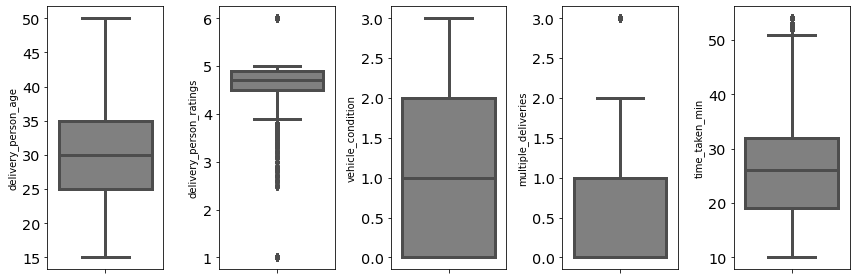

In [12]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

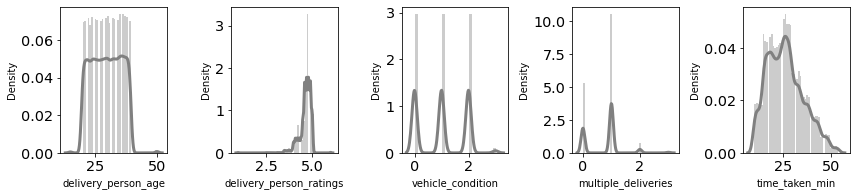

In [13]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums), i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

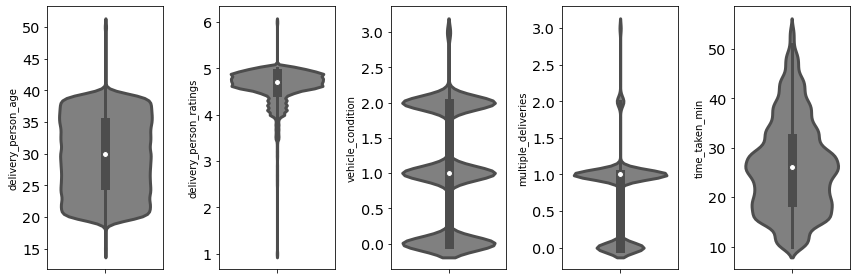

In [14]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

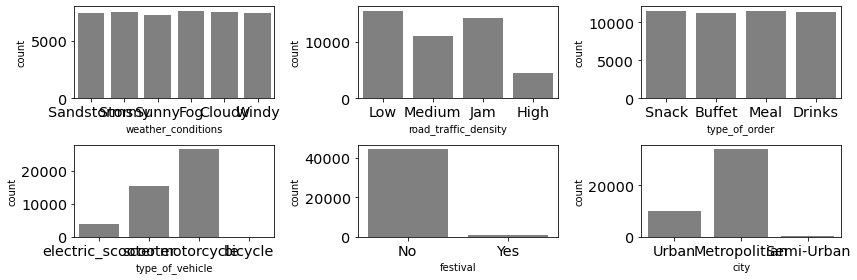

In [15]:
for i in range(0, len(cats[2:])):
    plt.subplot(2, 3, i+1)
    sns.countplot(df[cats[2:][i]], color='gray', orient='h')
    plt.tight_layout()

In [16]:
df.corr()

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,vehicle_condition,multiple_deliveries,time_taken_min
delivery_person_age,1.000000,-0.067939,-0.004532,-0.009347,0.002489,-0.000495,0.003308,0.115851,0.299474
delivery_person_ratings,-0.067939,1.000000,-0.007792,-0.014203,-0.010318,-0.013552,0.034581,-0.117647,-0.338790
restaurant_latitude,-0.004532,-0.007792,1.000000,0.661784,0.866378,0.602713,-0.033551,0.008051,0.013981
restaurant_longitude,-0.009347,-0.014203,0.661784,1.000000,0.632293,0.915026,-0.038744,0.004461,0.007821
delivery_location_latitude,0.002489,-0.010318,0.866378,0.632293,1.000000,0.690515,-0.001604,0.010277,0.014243
delivery_location_longitude,-0.000495,-0.013552,0.602713,0.915026,0.690515,1.000000,-0.001960,0.005023,0.007625
vehicle_condition,0.003308,0.034581,-0.033551,-0.038744,-0.001604,-0.001960,1.000000,-0.097270,-0.234398
multiple_deliveries,0.115851,-0.117647,0.008051,0.004461,0.010277,0.005023,-0.097270,1.000000,0.387051
time_taken_min,0.299474,-0.338790,0.013981,0.007821,0.014243,0.007625,-0.234398,0.387051,1.000000


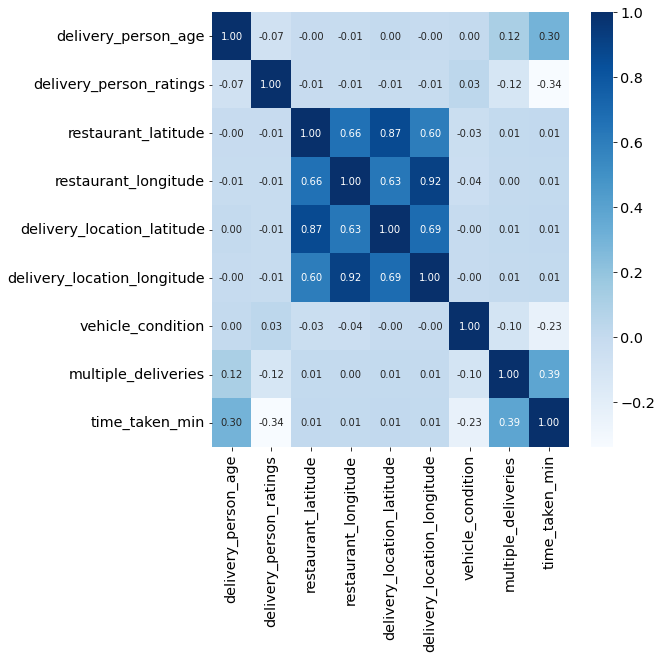

In [17]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 1080x1080 with 0 Axes>

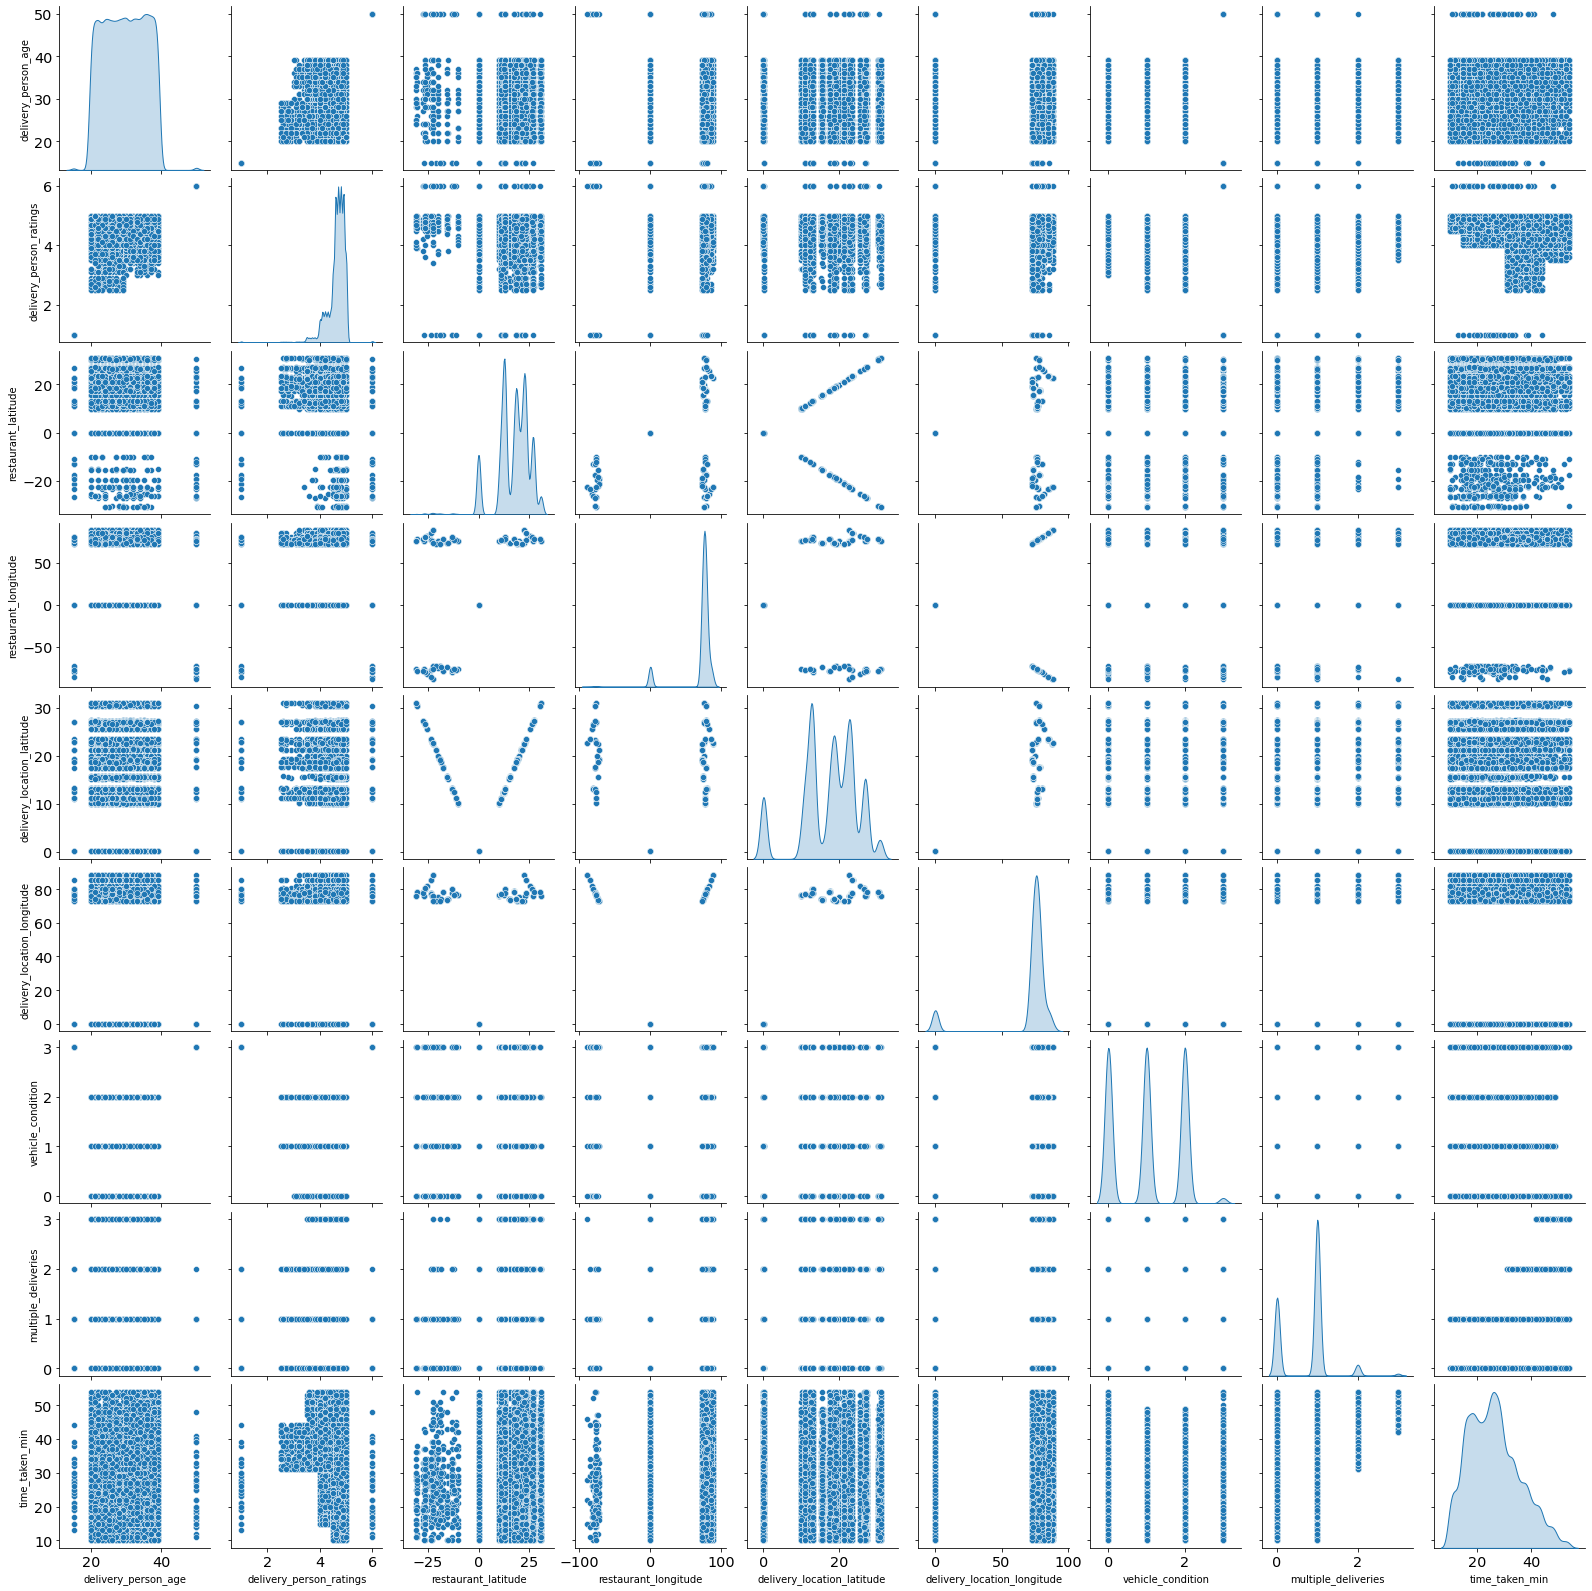

In [18]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

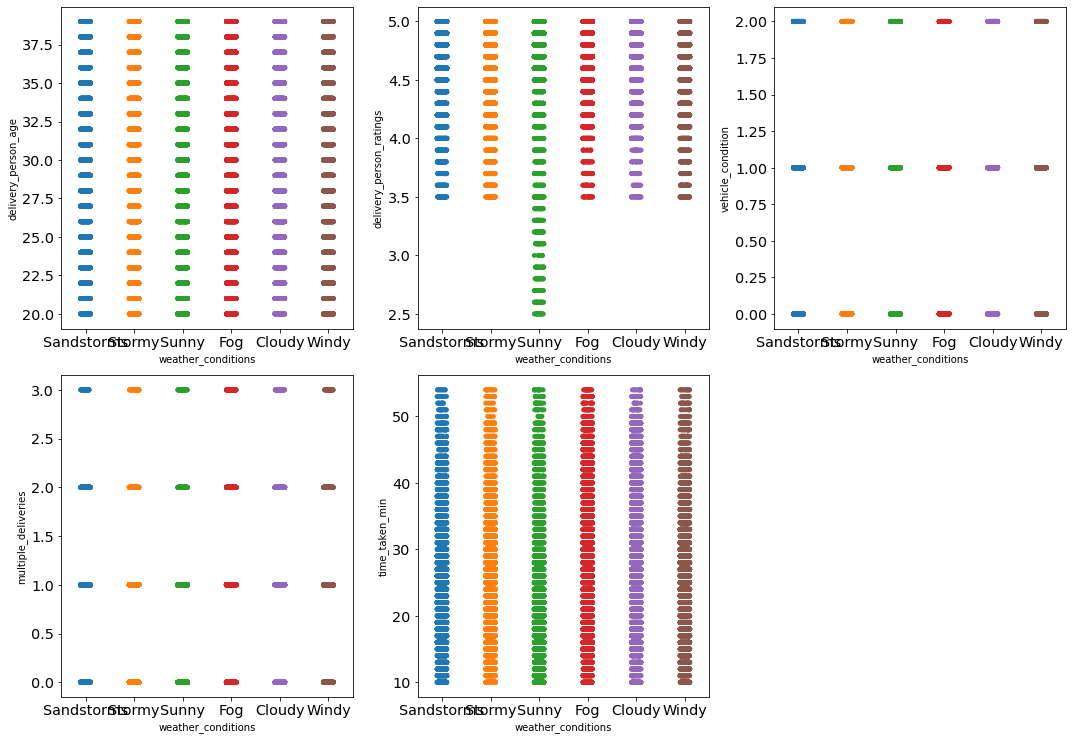

In [19]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='weather_conditions', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

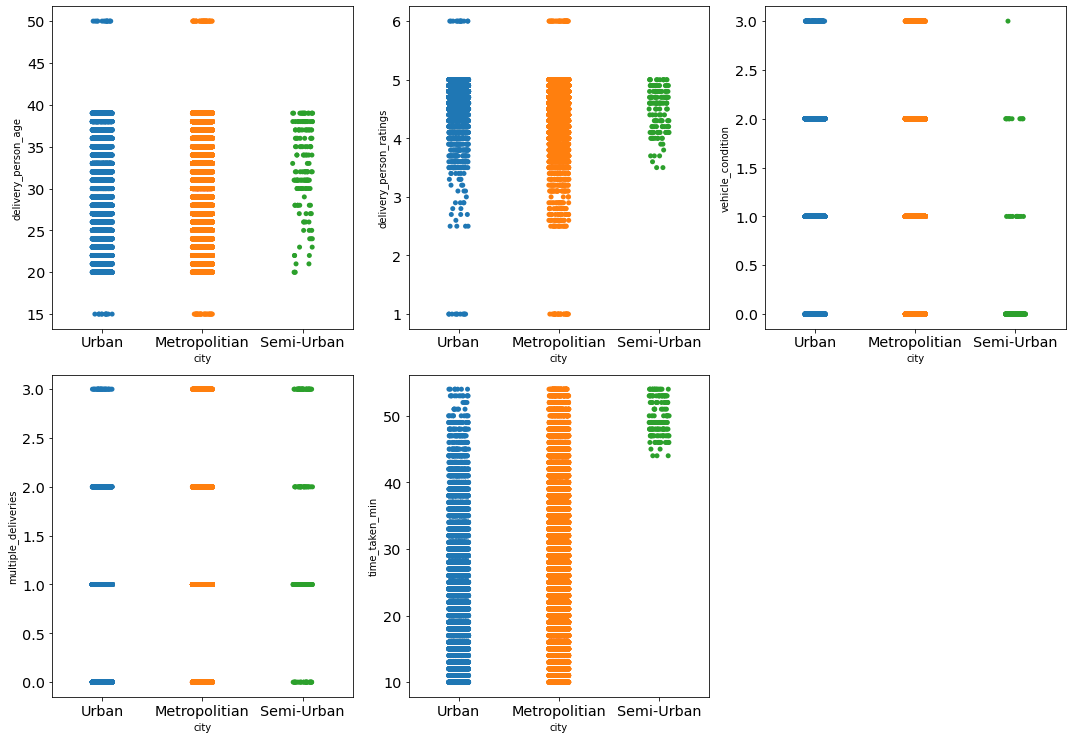

In [20]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='city', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

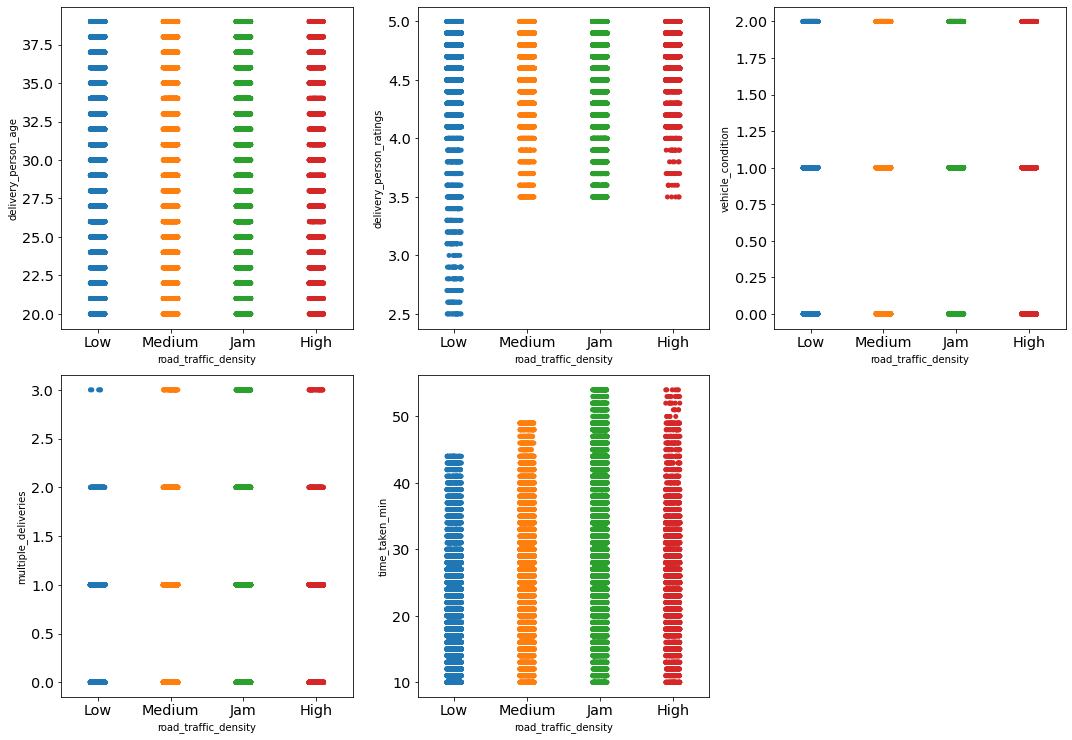

In [21]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='road_traffic_density', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

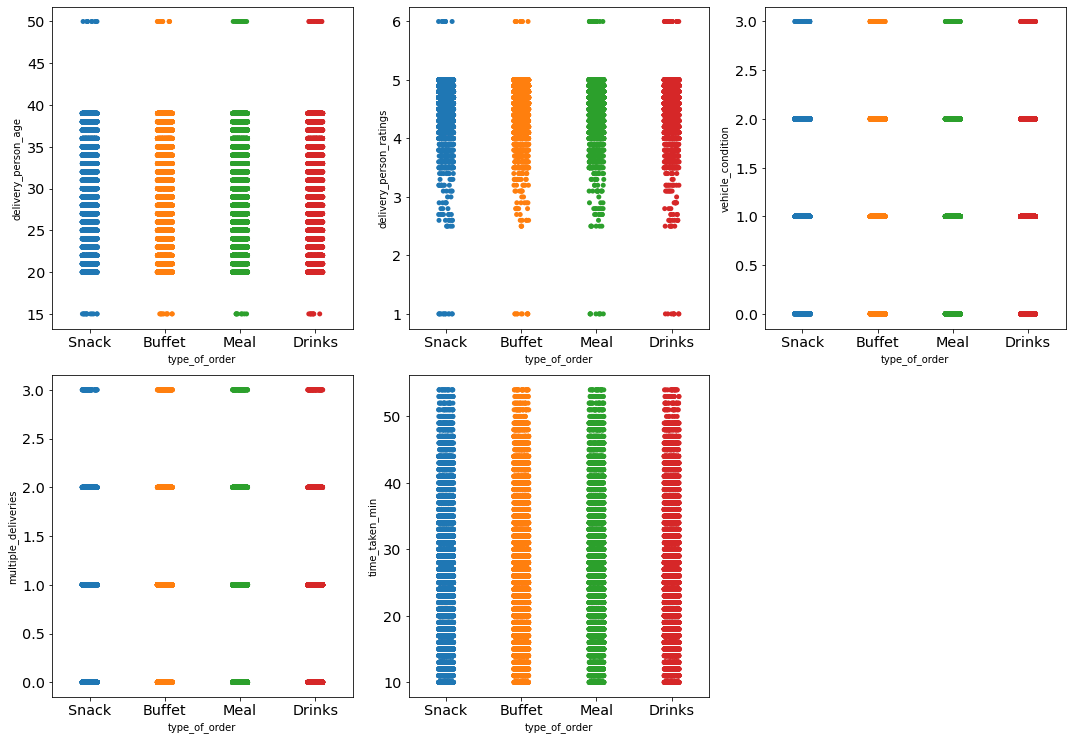

In [22]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='type_of_order', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

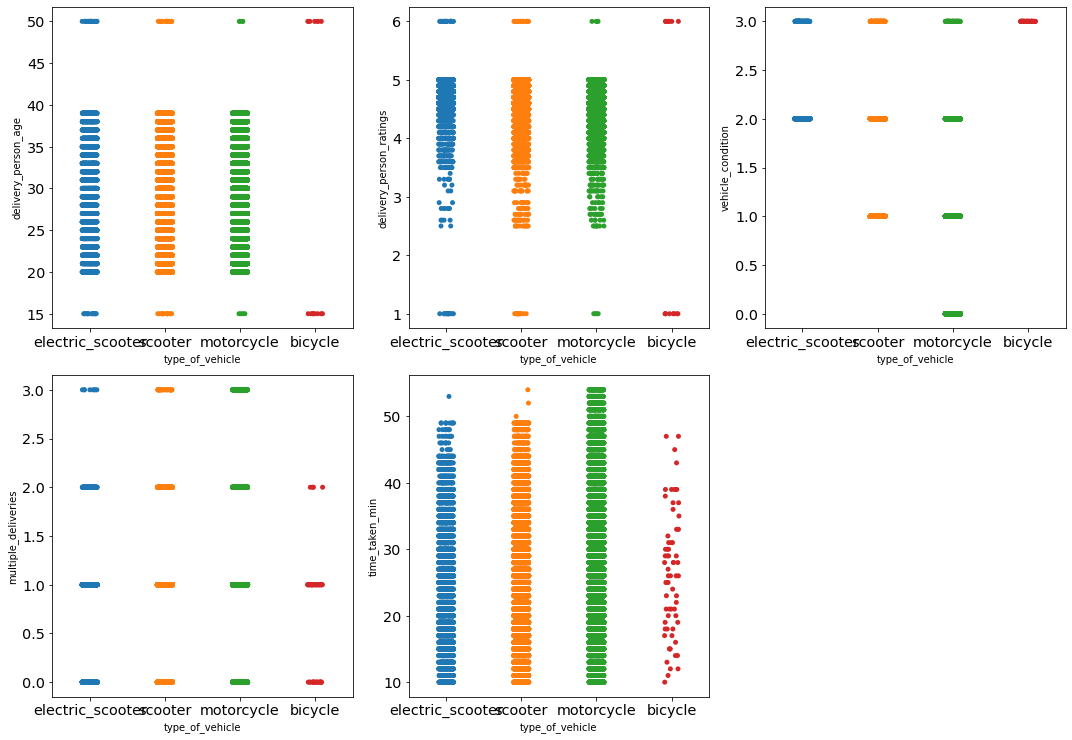

In [23]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='type_of_vehicle', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()